<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Знакомство-с-данными." data-toc-modified-id="Знакомство-с-данными.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Знакомство с данными.</a></span></li><li><span><a href="#Исследование-баланса-классов." data-toc-modified-id="Исследование-баланса-классов.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование баланса классов.</a></span></li><li><span><a href="#Разделение-данных-на-выборки." data-toc-modified-id="Разделение-данных-на-выборки.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Разделение данных на выборки.</a></span><ul class="toc-item"><li><span><a href="#Обучение-модели-без-учёта-дисбаланса." data-toc-modified-id="Обучение-модели-без-учёта-дисбаланса.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Обучение модели без учёта дисбаланса.</a></span></li><li><span><a href="#Обучение-модели-с-учётом-дисбаланса." data-toc-modified-id="Обучение-модели-с-учётом-дисбаланса.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение модели с учётом дисбаланса.</a></span><ul class="toc-item"><li><span><a href="#Использование-техники-upsampling." data-toc-modified-id="Использование-техники-upsampling.-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Использование техники upsampling.</a></span></li><li><span><a href="#Использование-техники-downsampling." data-toc-modified-id="Использование-техники-downsampling.-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Использование техники downsampling.</a></span></li></ul></li></ul></li><li><span><a href="#Проверка-F1-меры-на-тестовой-выборке." data-toc-modified-id="Проверка-F1-меры-на-тестовой-выборке.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка F1-меры на тестовой выборке.</a></span></li><li><span><a href="#Дополнительная-проверка-через-построение-Roc-кривых." data-toc-modified-id="Дополнительная-проверка-через-построение-Roc-кривых.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Дополнительная проверка через построение Roc-кривых.</a></span></li><li><span><a href="#Общий-вывод-по-исследованию:" data-toc-modified-id="Общий-вывод-по-исследованию:-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод по исследованию:</a></span></li></ul></div>

<div class="alert alert-info"><b>Описание проекта:</b>
   
# "Прогноз поведения клиента банка: уйдёт или останется"

***

**Цели проекта:**
- спрогнозировать, уйдёт клиент из банка в ближайшее время или нет.
    
***
    
**Задачи исследования:**  
- проанализировать поведение клиентов банка;
- по результатам проведенного анализа данных построить модель (с предельно большим значением F1-меры, нужно довести метрику до 0.59), которая поможет спрогнозировать, уйдёт клиент из банка в ближайшее время или нет;
- проверить качество модели на тестовой выборке.
    
***
    
**Этапы исследования:** 
- знакомство с данными;
- исследование баланса классов;
- разделение данных на выборки, поиск лучшей модели;
- проверка F1-меры на тестовой выборке;
- дополнительная проверка через построение Roc-кривых;
- общий вывод по исследованию.
    
***
    
<b>Описание данных:</b> 

Признаки:
* RowNumber — индекс строки в данных
* CustomerId — уникальный идентификатор клиента
* Surname — фамилия
* CreditScore — кредитный рейтинг
* Geography — страна проживания
* Gender — пол
* Age — возраст
* Tenure — сколько лет человек является клиентом банка
* Balance — баланс на счёте
* NumOfProducts — количество продуктов банка, используемых клиентом
* HasCrCard — наличие кредитной карты
* IsActiveMember — активность клиента
* EstimatedSalary — предполагаемая зарплата  

Целевой признак:
* Exited — факт ухода клиента
    
***
      
В сооветствии с условиями построим модель для задачи классификации с учителем.
    
</div>

***

### Знакомство с данными.

In [3]:
import warnings

import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE

from sklearn.metrics import (
    f1_score,
    recall_score,
    roc_auc_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve
)

# Избавляемся от вывода предупреждений
warnings.simplefilter("ignore")

# Отображение всех колонок
pd.set_option('display.max_columns', None)

RANDOM_STATE = 12345

In [4]:
# Открываем файл с датасетом, выводим первые 5 строк.

try:
    data = pd.read_csv('C:/Датасеты и проекты/Churn.csv')
except:
    data = pd.read_csv('/datasets/Churn.csv')
    
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [5]:
# Получаем информацию о датасете.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
# Узнаем количество строк и столбцов в датафрейме.
data.shape

(10000, 14)

In [7]:
data.duplicated().sum()
# Явных дубликатов не обнаружено.

0

In [8]:
# Выводим количество пропущенных значений для каждого признака.
data.isna().sum()
# Имеются пропуски в признаке 'Tenure'.

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [9]:
# Исследуем значения признака 'Tenure'.
data['Tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

In [10]:
# Заменим пропуски признака 'Tenure' медианным значением признака.
data['Tenure'] = data['Tenure'].fillna(data['Tenure'].median())

In [11]:
# Исследуем типы признаков.
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

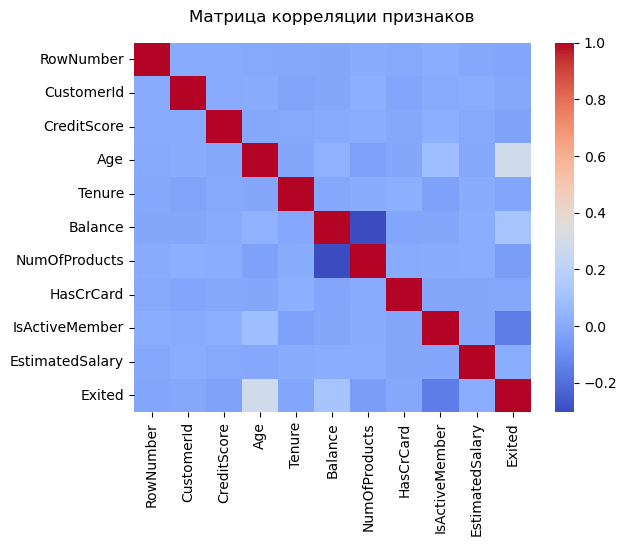

In [12]:
# Построим матрицу корреляции признаков.
sns.heatmap(data.corr(), annot=False, cmap='coolwarm');
plt.title('Матрица корреляции признаков', pad = 15);

 <div class="alert alert-info"><b>Комментарий:</b>
   
Явных зависимостей между признаками не прослеживается.
</div>

In [13]:
# Удалим ненужные признаки.
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


 <div class="alert alert-info"><b>Комментарий:</b>
   
Поскольку признаки 'RowNumber', 'CustomerId', 'Surname' содержат уникальные значения и явной зависимости целевого признака 'Exited' от них не прослеживается, удаляем указанные признаки.
</div>

***

### Исследование баланса классов.

In [14]:
# Посмотрим распределение численных значений признаков.
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,NaN,NaN,NaN,4.9979,2.76001,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0
HasCrCard,10000.0,NaN,NaN,NaN,0.7055,0.45584,0.0,0.0,1.0,1.0,1.0
IsActiveMember,10000.0,NaN,NaN,NaN,0.5151,0.499797,0.0,0.0,1.0,1.0,1.0
EstimatedSalary,10000.0,NaN,NaN,NaN,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


 <div class="alert alert-info"><b>Наблюдения:</b>
   
Прослеживается неравномерное распределение значений признака 'Exited'
</div>

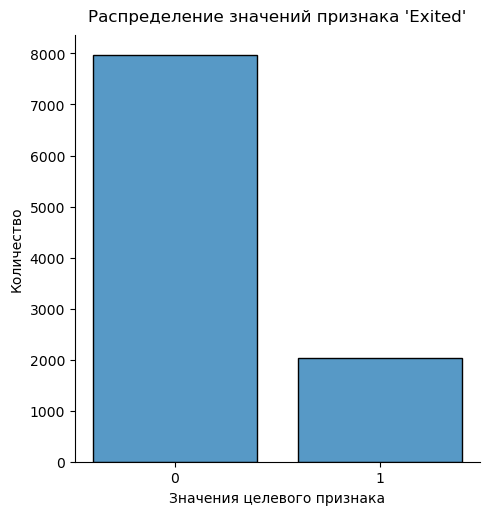

In [15]:
# Посмотрим распределение значений признака 'Exited' на графике.
sns.displot(data, x="Exited", shrink=.8, discrete=True)

plt.xticks(data['Exited'].unique())
plt.xlabel('Значения целевого признака')
plt.ylabel('Количество')
plt.title("Распределение значений признака 'Exited'", pad = 10);

 <div class="alert alert-info"><b>Наблюдения:</b>
   
Прослеживается несбалансированность классов в целевом признаке ('Exited') в отношении 1:4.
</div>

***

### Разделение данных на выборки.

 <div class="alert alert-info"><b>Комментарий:</b>
   
Выберем в качестве целевого признак 'Exited'. Сформируем обучающую, валидационную и тестовую выборки.
</div>

In [16]:
# Разделим исходные данные на обучающую, валидационную и тестовую выборки из расчета 60% - 20% - 20% соответственно.
data_train, data_valid = train_test_split(data, test_size=0.40, random_state=RANDOM_STATE, stratify = data['Exited'])
data_valid, data_test = train_test_split(data_valid, test_size=0.50, random_state=RANDOM_STATE, stratify = data_valid['Exited'])

features_train = data_train.drop(['Exited'], axis=1)
target_train = data_train['Exited']

features_valid = data_valid.drop(['Exited'], axis=1)
target_valid = data_valid['Exited']

features_test = data_test.drop(['Exited'], axis=1)
target_test = data_test['Exited']

In [17]:
# Узнаем количество строк в обучающей выборке.
print(features_train.shape)
print(target_train.shape)

(6000, 10)
(6000,)


In [18]:
# Узнаем количество строк в валидационной выборке.
print(features_valid.shape)
print(target_valid.shape)

(2000, 10)
(2000,)


In [19]:
# Узнаем количество строк в тестовой выборке.
print(features_test.shape)
print(target_test.shape)

(2000, 10)
(2000,)


In [20]:
# Применим кодирование данных с использованием OneHotEncoder.

# drop='first' удаляет первый признак из закодированных:
# таким образом обходим dummy-ловушку
# задаём handle_unknown='ignore':
# игнорируется ранее невстречающиеся значения признака (при transform)
encoder_ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)
ohe_features = features_train.select_dtypes(include='object').columns.to_list()
# обучаем энкодер на заданных категориальных признаках тренировочной выборки
encoder_ohe.fit(features_train[ohe_features])
num_features = features_train.select_dtypes(exclude='object').columns.to_list()
# добавляем закодированные признаки в X_train_ohe
# encoder_ohe.get_feature_names_out() позволяет получить названия колонок
features_train[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_train[ohe_features])

# удаляем незакодированные категориальные признаки (изначальные колонки)
features_train = features_train.drop(ohe_features, axis=1)

# создаём скелер
scaler = StandardScaler()

# обучаем его на численных признаках тренировочной выборки, трансформируем её же
features_train[num_features] = scaler.fit_transform(features_train[num_features])

In [21]:
# смотрим на результат
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2837,-1.040434,0.953312,0.360600,0.774657,-0.914708,-1.525709,0.969466,-0.119110,1.0,0.0,0.0
9925,0.454006,-0.095244,-0.002786,1.910540,-0.914708,0.655433,0.969466,-0.258658,0.0,0.0,0.0
8746,0.103585,-0.476537,1.087371,0.481608,0.820981,-1.525709,0.969466,1.422836,0.0,0.0,1.0
660,-0.184996,0.190726,-0.002786,0.088439,-0.914708,0.655433,0.969466,-1.160427,1.0,0.0,0.0
3610,-0.720933,1.620574,-1.456328,0.879129,-0.914708,0.655433,-1.031496,0.113236,0.0,0.0,0.0


In [22]:
# энкодером, который обучен на ТРЕНИРОВОЧНОЙ ВЫБОРКЕ, кодируем валидационную
features_valid[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_valid[ohe_features])

features_valid = features_valid.drop(ohe_features, axis=1)

# скелером, который обучен на ТРЕНИРОВОЧНОЙ ВЫБОРКЕ, масштабируем валидационную
features_valid[num_features] = scaler.transform(
    features_valid[num_features]
)

In [23]:
# смотрим на результат
features_valid.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
6612,-1.524838,2.383160,-0.729557,1.011655,-0.914708,-1.525709,0.969466,0.010275,0.0,0.0,0.0
519,0.587990,1.811221,0.360600,0.213192,-0.914708,-1.525709,0.969466,0.453089,0.0,0.0,1.0
1609,-0.318980,-0.381213,1.087371,0.893896,-0.914708,0.655433,-1.031496,-0.603508,0.0,0.0,0.0
3475,1.226991,-0.762506,-0.366172,-0.240363,0.820981,0.655433,0.969466,-1.621460,0.0,0.0,1.0
2707,-0.133464,-0.095244,-0.729557,0.447305,-0.914708,-1.525709,-1.031496,0.338574,0.0,0.0,0.0


In [24]:
# энкодером, который обучен на ТРЕНИРОВОЧНОЙ ВЫБОРКЕ, кодируем тестовую
features_test[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_test[ohe_features])

features_test = features_test.drop(ohe_features, axis=1)

# скелером, который обучен на ТРЕНИРОВОЧНОЙ ВЫБОРКЕ, масштабируем тестовую
features_test[num_features] = scaler.transform(
    features_test[num_features]
)

In [25]:
# смотрим на результат
features_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
657,-0.504497,1.429928,-1.456328,0.873883,0.820981,0.655433,0.969466,1.725255,1.0,0.0,0.0
2083,-1.195031,-1.429769,-1.456328,-1.219673,-0.914708,0.655433,0.969466,1.203665,0.0,0.0,1.0
3234,-1.267176,0.762665,-1.456328,-1.219673,-0.914708,0.655433,-1.031496,-1.374743,0.0,0.0,1.0
1551,0.825039,1.239281,0.723985,-1.219673,0.820981,-1.525709,0.969466,0.382306,0.0,1.0,0.0
2344,0.660135,0.953312,-0.366172,0.267087,-0.914708,0.655433,-1.031496,-1.613578,1.0,0.0,0.0


 <div class="alert alert-info"><b>Комментарий:</b>
   
Проведены кодирование с использованием OneHotEncoder и масштабирование.
</div>

#### Обучение модели без учёта дисбаланса.

In [26]:
%%time

# Исследуем качество модели "дерево решений".
best_model_tree = None
best_result_tree = 0
best_depth_tree = 0
best_max_leaf_nodes = 0

for depth in range(1, 11):
    for nodes in range(2, 50):    
        model_1 = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=depth, max_leaf_nodes=nodes)
        model_1.fit(features_train, target_train)
        predictions_valid = model_1.predict(features_valid) # < найдите предсказания на валидационной выборке >
        result = f1_score(target_valid, predictions_valid)
        if result > best_result_tree:
            best_model_tree = model_1
            best_result_tree = result #  сохраните наилучшее значение метрики accuracy на валидационных данных
            best_depth_tree = depth
            best_max_leaf_nodes = nodes
            probabilities_valid = best_model_tree.predict_proba(features_valid)                    
            auc_roc_tree = roc_auc_score(target_valid, probabilities_valid[:, 1])

print('Значение F1-меры наилучшей модели на валидационной выборке:', best_result_tree)
print('Значение AUC-ROC наилучшей модели на валидационной выборке:', auc_roc_tree)
print('Максимальная глубина:', best_depth_tree)
print('максимальное количество листьев в дереве:', best_max_leaf_nodes)

Значение F1-меры наилучшей модели на валидационной выборке: 0.6017441860465116
Значение AUC-ROC наилучшей модели на валидационной выборке: 0.8488490245344369
Максимальная глубина: 7
максимальное количество листьев в дереве: 41
Wall time: 9.91 s


In [27]:
%%time

# Исследуем качество модели "случайный лес".
best_model_forest = None
best_result_forest = 0
best_est_forest = 0
best_depth_forest = 0

for est in range(10, 51, 10):
    for depth in range (1, 11):
        model_2 = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=est, max_depth=depth)  
        model_2.fit(features_train, target_train)             
        predictions_valid = model_2.predict(features_valid)
        result = f1_score(target_valid, predictions_valid) 
        if result > best_result_forest:
            best_model_forest = model_2
            best_result_forest = result
            best_est_forest = est
            best_depth_forest = depth
            probabilities_valid = best_model_forest.predict_proba(features_valid)                    
            auc_roc_forest = roc_auc_score(target_valid, probabilities_valid[:, 1])

print("Значение F1-меры наилучшей модели на валидационной выборке:", best_result_forest)
print('Значение AUC-ROC наилучшей модели на валидационной выборке:', auc_roc_forest)
print("Количество деревьев:", best_est_forest)
print("Максимальная глубина:", best_depth_forest)

Значение F1-меры наилучшей модели на валидационной выборке: 0.6036585365853658
Значение AUC-ROC наилучшей модели на валидационной выборке: 0.8669273142674153
Количество деревьев: 20
Максимальная глубина: 10
Wall time: 8.97 s


In [28]:
%%time

# Исследуем качество модели "логистическая регрессия".
best_model_logistic = None
best_result_logistic = 0
best_solver_logistic = ''

solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

for solver in solvers:
    model_3 = LogisticRegression(random_state=RANDOM_STATE, solver=solver).fit(features_train, target_train)    
    predictions_valid = model_3.predict(features_valid)
    result = f1_score(target_valid, predictions_valid) 
    if result > best_result_logistic:
        best_model_logistic = model_3
        best_result_logistic = result
        best_solver_logistic = solver
        probabilities_valid = best_model_logistic.predict_proba(features_valid)                    
        auc_roc_iogistic = roc_auc_score(target_valid, probabilities_valid[:, 1])
        
print("Значение F1-меры наилучшей модели на валидационной выборке:", best_result_logistic)
print('Значение AUC-ROC наилучшей модели на валидационной выборке:', auc_roc_iogistic)
print("Наилучшее значение параметра solver:", best_solver_logistic)

Значение F1-меры наилучшей модели на валидационной выборке: 0.3076923076923077
Значение AUC-ROC наилучшей модели на валидационной выборке: 0.7874421125234012
Наилучшее значение параметра solver: newton-cg
Wall time: 261 ms


 <div class="alert alert-info"><b>Наблюдения:</b>
    
   
По итогам сравнения качества разных моделей с учетом их гиперпараметров максимальное значение F1-меры на валидационной выборке без учета дисбаланса у модели RandomForestClassifier - 0.6036585365853658 (с количеством деревьев: 20 и при максимальной глубине: 10).
</div>

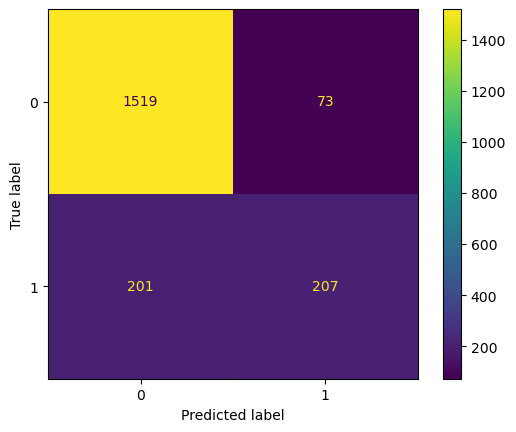

In [29]:
# Построим матрицу ошибок для выбранной модели DecisionTreeClassifier.
predicted_valid = best_model_tree.predict(features_valid)
c_matrix = confusion_matrix(target_valid, predicted_valid)

ConfusionMatrixDisplay(c_matrix).plot();

 <div class="alert alert-info"><b>Наблюдения:</b>

По итогам применения матрицы ошибок наблюдаем следующее:
- 1519 предсказаний были истинно негативными,
- 207 предсказаний были истинно позитивными,
- 73 предсказания были ошибочно позитивными,
- 201 предсказание были ошибочно негативными.

Без учета дисбаланса классов целевого признака модель показывает ошибки при предсказании негативных признаков.
</div>

#### Обучение модели с учётом дисбаланса.

##### Использование техники upsampling.

In [30]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=RANDOM_STATE)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [31]:
%%time

# Исследуем качество модели "дерево решений".
best_model_tree = None
best_result_tree = 0
best_depth_tree = 0
best_max_leaf_nodes = 0

for depth in range(1, 11):
    for nodes in range(2, 50):    
        model_1 = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=depth, max_leaf_nodes=nodes, class_weight='balanced')
        model_1.fit(features_upsampled, target_upsampled)
        predictions_valid = model_1.predict(features_valid)
        result = f1_score(target_valid, predictions_valid)
        if result > best_result_tree:
            best_model_tree_upsampled = model_1
            best_result_tree = result
            best_depth_tree = depth
            best_max_leaf_nodes = nodes
            probabilities_valid = best_model_tree_upsampled.predict_proba(features_valid)                    
            auc_roc_tree_upsampled = roc_auc_score(target_valid, probabilities_valid[:, 1])


print('Значение F1-меры наилучшей модели на валидационной выборке:', best_result_tree)
print('Значение AUC-ROC наилучшей модели на валидационной выборке:', auc_roc_tree_upsampled)
print('Максимальная глубина:', best_depth_tree)
print('максимальное количество листьев в дереве:', best_max_leaf_nodes)

Значение F1-меры наилучшей модели на валидационной выборке: 0.5950248756218905
Значение AUC-ROC наилучшей модели на валидационной выборке: 0.846540453492955
Максимальная глубина: 9
максимальное количество листьев в дереве: 33
Wall time: 13.4 s


In [32]:
%%time

# Исследуем качество модели "случайный лес".
best_model_forest = None
best_result_forest = 0
best_est_forest = 0
best_depth_forest = 0

for est in range(10, 51, 10):
    for depth in range (1, 11):
        model_2 = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=est, max_depth=depth, class_weight='balanced')  
        model_2.fit(features_upsampled, target_upsampled)             
        predictions_valid = model_2.predict(features_valid)
        result = f1_score(target_valid, predictions_valid) 
        if result > best_result_forest:
            best_model_forest_upsampled = model_2
            best_result_forest = result
            best_est_forest = est
            best_depth_forest = depth
            probabilities_valid = best_model_forest_upsampled.predict_proba(features_valid)                    
            auc_roc_forest_upsampled = roc_auc_score(target_valid, probabilities_valid[:, 1])

print("Значение F1-меры наилучшей модели на валидационной выборке:", best_result_forest)
print('Значение AUC-ROC наилучшей модели на валидационной выборке:', auc_roc_forest_upsampled)
print("Количество деревьев:", best_est_forest)
print("Максимальная глубина:", best_depth_forest)

Значение F1-меры наилучшей модели на валидационной выборке: 0.6411889596602973
Значение AUC-ROC наилучшей модели на валидационной выборке: 0.8691373534338358
Количество деревьев: 40
Максимальная глубина: 9
Wall time: 12 s


In [33]:
%%time

# Исследуем качество модели "логистическая регрессия".
best_model_logistic = None
best_result_logistic = 0
best_solver_logistic = ''

solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

for solver in solvers:
    model_3 = LogisticRegression(random_state=RANDOM_STATE, solver=solver, class_weight='balanced').fit(features_upsampled, target_upsampled)    
    predictions_valid = model_3.predict(features_valid)
    result = f1_score(target_valid, predictions_valid) 
    if result > best_result_logistic:
        best_model_logistic_upsampled = model_3
        best_result_logistic = result
        best_solver_logistic = solver
        probabilities_valid = best_model_logistic_upsampled.predict_proba(features_valid)                    
        auc_roc_iogistic_upsampled = roc_auc_score(target_valid, probabilities_valid[:, 1])
        
print("Значение F1-меры наилучшей модели на валидационной выборке:", best_result_logistic)
print('Значение AUC-ROC наилучшей модели на валидационной выборке:', auc_roc_iogistic_upsampled)
print("Наилучшее значение параметра solver:", best_solver_logistic)

Значение F1-меры наилучшей модели на валидационной выборке: 0.5280701754385966
Значение AUC-ROC наилучшей модели на валидационной выборке: 0.7936450019706375
Наилучшее значение параметра solver: newton-cg
Wall time: 245 ms


##### Использование техники downsampling.

In [34]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=RANDOM_STATE)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=RANDOM_STATE)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=RANDOM_STATE)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

In [35]:
%%time

# Исследуем качество модели "дерево решений".
best_model_tree = None
best_result_tree = 0
best_depth_tree = 0
best_max_leaf_nodes = 0

for depth in range(1, 11):
    for nodes in range(2, 50):    
        model_1 = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=depth, max_leaf_nodes=nodes, class_weight='balanced')
        model_1.fit(features_downsampled, target_downsampled)
        predictions_valid = model_1.predict(features_valid) # < найдите предсказания на валидационной выборке >
        result = f1_score(target_valid, predictions_valid)
        if result > best_result_tree:
            best_model_tree_downsampled = model_1
            best_result_tree = result #  сохраните наилучшее значение метрики accuracy на валидационных данных
            best_depth_tree = depth
            best_max_leaf_nodes = nodes
            probabilities_valid = best_model_tree_downsampled.predict_proba(features_valid)                    
            auc_roc_tree_downsampled = roc_auc_score(target_valid, probabilities_valid[:, 1])

print('Значение F1-меры наилучшей модели на валидационной выборке:', best_result_tree)
print('Значение AUC-ROC наилучшей модели на валидационной выборке:', auc_roc_tree_downsampled)
print('Максимальная глубина:', best_depth_tree)
print('максимальное количество листьев в дереве:', best_max_leaf_nodes)

Значение F1-меры наилучшей модели на валидационной выборке: 0.5935483870967742
Значение AUC-ROC наилучшей модели на валидационной выборке: 0.8536963309193024
Максимальная глубина: 6
максимальное количество листьев в дереве: 26
Wall time: 5.66 s


In [36]:
%%time

# Исследуем качество модели "случайный лес".
best_model_forest = None
best_result_forest = 0
best_est_forest = 0
best_depth_forest = 0

for est in range(10, 51, 10):
    for depth in range (1, 11):
        model_2 = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=est, max_depth=depth, class_weight='balanced')  
        model_2.fit(features_downsampled, target_downsampled)             
        predictions_valid = model_2.predict(features_valid)
        result = f1_score(target_valid, predictions_valid) 
        if result > best_result_forest:
            best_model_forest_downsampled = model_2
            best_result_forest = result
            best_est_forest = est
            best_depth_forest = depth
            probabilities_valid = best_model_forest_downsampled.predict_proba(features_valid)                    
            auc_roc_forest_downsampled = roc_auc_score(target_valid, probabilities_valid[:, 1])

print("Значение F1-меры наилучшей модели на валидационной выборке:", best_result_forest) 
print('Значение AUC-ROC наилучшей модели на валидационной выборке:', auc_roc_forest_downsampled)
print("Количество деревьев:", best_est_forest)
print("Максимальная глубина:", best_depth_forest)

Значение F1-меры наилучшей модели на валидационной выборке: 0.6362754607177498
Значение AUC-ROC наилучшей модели на валидационной выборке: 0.8673514631983448
Количество деревьев: 50
Максимальная глубина: 7
Wall time: 4.83 s


In [37]:
%%time

# Исследуем качество модели "логистическая регрессия".
best_model_logistic = None
best_result_logistic = 0
best_solver_logistic = ''

solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

for solver in solvers:
    model_3 = LogisticRegression(random_state=RANDOM_STATE, solver=solver, class_weight='balanced') \
        .fit(features_downsampled, target_downsampled)    
    predictions_valid = model_3.predict(features_valid)
    result = f1_score(target_valid, predictions_valid) 
    if result > best_result_logistic:
        best_model_logistic_downsampled = model_3
        best_result_logistic = result
        best_solver_logistic = solver
        probabilities_valid = best_model_logistic_downsampled.predict_proba(features_valid)                    
        auc_roc_iogistic_downsampled = roc_auc_score(target_valid, probabilities_valid[:, 1])
        
print("Значение F1-меры наилучшей модели на валидационной выборке:", best_result_logistic) 
print('Значение AUC-ROC наилучшей модели на валидационной выборке:', auc_roc_iogistic_downsampled)
print("Наилучшее значение параметра solver:", best_solver_logistic)

Значение F1-меры наилучшей модели на валидационной выборке: 0.525217391304348
Значение AUC-ROC наилучшей модели на валидационной выборке: 0.7923533106710019
Наилучшее значение параметра solver: newton-cg
Wall time: 118 ms


 <div class="alert alert-info"><b>Комментарий:</b>
   
- По итогам сравнения качества разных моделей с учетом их гиперпараметров и применяемых техник upsampling и downsampling максимальное значение F1-меры на валидационной выборке с учетом дисбаланса у модели RandomForestClassifier (upsampling) - <b>0.6411889596602973</b> (с количеством деревьев: 40 и при максимальной глубине дерева: 9), что  удовлетворяет условиям задачи (довести метрику до 0.59). Применим эту модель к тестовой выборке.
- При сравнении значений AUC-ROC максимальное значение на валидационной выборке с учетом дисбаланса также показала модель RandomForestClassifier (upsampling) - <b>0.8691373534338358</b>.
</div>

***

### Проверка F1-меры на тестовой выборке.

In [38]:
# Получим значение F1-меры с использованием выбранной модели на тестовой выборке.
predictions_test = best_model_forest_upsampled.predict(features_test)
print('Значение F1-меры модели на тестовой выборке:', f1_score(target_test, predictions_test)) 
print('Значение полноты модели на тестовой выборке:', recall_score(target_test, predictions_test)) 

Значение F1-меры модели на тестовой выборке: 0.6071817192600653
Значение полноты модели на тестовой выборке: 0.6855036855036855


 <div class="alert alert-info"><b>Комментарий:</b>
   
На тестовой выборке с применением выбранной модели значение F1-меры составило <b>0.6071817192600653</b>, что  удовлетворяет условиям задачи (довести метрику до 0.59).   
Значение полноты модели на тестовой выборке 0.6855036855036855.   
Таким образом, лучшей моделью является RandomForestClassifier ("случайный лес") с количеством деревьев: 40 и при максимальной глубине дерева: 9.   
Модель верно определяет 68,6% клиентов, которые отказались от услуг банка.
</div>

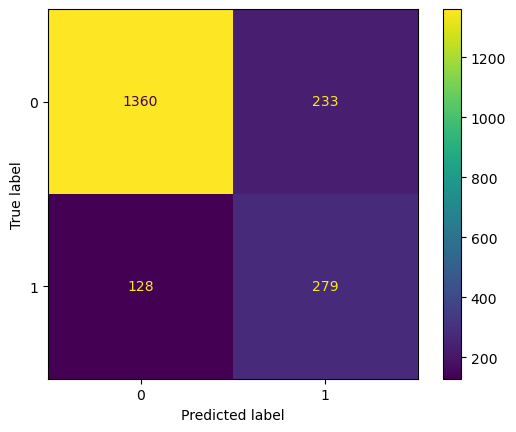

In [39]:
# Построим матрицу ошибок для выбранной модели RandomForestClassifier.
c_matrix = confusion_matrix(target_test, predictions_test)

ConfusionMatrixDisplay(c_matrix).plot();

In [40]:
dummy_model = DummyClassifier(strategy='constant', constant=1).fit(features_train, target_train)
f1_score(dummy_model.predict(features_test), target_test)

0.3381803074366431

 <div class="alert alert-info"><b>Комментарий:</b>
   
Выбранная нами модель RandomForestClassifier показывает результат на 27% выше случайного.

</div>

***

### Дополнительная проверка через построение Roc-кривых.

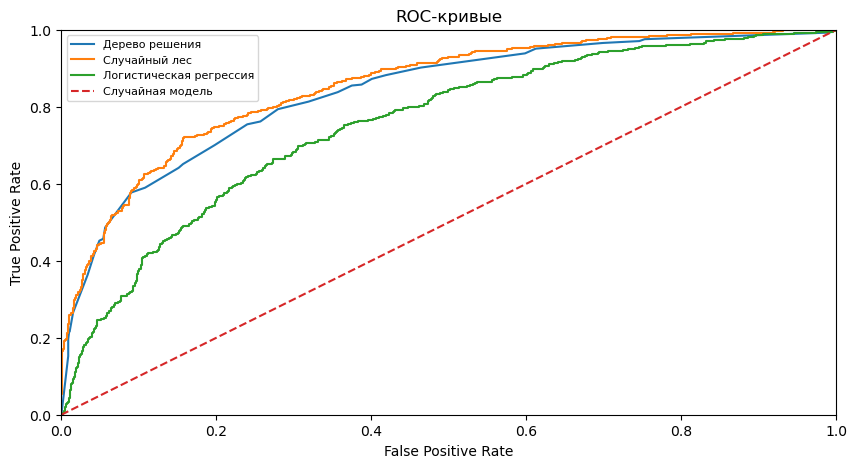

In [41]:
# Построим дополнительно Roc-кривые на тестовых данных для моделей, полученных техниками upsampling, с 
# наибольшим значением F1-меры.

# Модель DecisionTreeClassifier (upsampling)
probabilities_test_tree = best_model_tree_upsampled.predict_proba(features_test)
fpr_tree, tpr_tree, thresholds = roc_curve(target_test, probabilities_test_tree[:, 1])

# Модель RandomForestClassifier (upsampling)
probabilities_test_forest = best_model_forest_upsampled.predict_proba(features_test)
fpr_forest, tpr_forest, thresholds = roc_curve(target_test, probabilities_test_forest[:, 1])

# Модель LogisticRegression (upsampling)
probabilities_test_log = best_model_logistic_upsampled.predict_proba(features_test)
fpr_log, tpr_log, thresholds = roc_curve(target_test, probabilities_test_log[:, 1])

plt.figure(figsize=(10,5))

plt.plot(fpr_tree, tpr_tree)
plt.plot(fpr_forest, tpr_forest)
plt.plot(fpr_log, tpr_log)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.ylim([0, 1])
plt.xlim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые')
plt.legend(('Дерево решения', 'Случайный лес', 'Логистическая регрессия', 'Случайная модель'), loc='upper left', fontsize=8);

 <div class="alert alert-info"><b>Комментарий:</b>
   
Выбранная нами модель RandomForestClassifier при исследовании Roc-кривых на тестовых данных также показывает лучший результат по сравнению с другими моделями.
</div>

***

 <div class="alert alert-info"><b><h3>Общий вывод по исследованию:</h3></b>

* В целях решения поставленных задач исходные данные были разделены на 3 выборки (обучающую, валидационную и тестовую), закодированы OneHotEncoder и масштабированы.      
* Были исследованы три модели ML: DecisionTreeClassifier, RandomForestClassifier, LogisticRegression, сначала без учета дисбаланса классов целевого признака, а потом после ребалансировки с использованием техник upsampling и downsampling - с учетом дисбаланса.
* По итогам сравнения качества разных моделей с учетом их гиперпараметров и применяемых техник upsampling и downsampling максимальное значение F1-меры на валидационной выборке с учетом дисбаланса было получено у модели RandomForestClassifier (upsampling) - <b>0.6411889596602973</b> (с количеством деревьев: 40 и при максимальной глубине дерева: 9), что  удовлетворяет условиям задачи (довести метрику до 0.59).
    
* В результате применения указанной модели к тестовой выборке значение F1-меры составило <b>0.6071817192600653</b>, что также удовлетворяет условиям задачи (довести метрику до 0.59).
    
* В ходе дополнительной проверки выбранная модель RandomForestClassifier при исследовании Roc-кривых на тестовых данных также показала лучший результат по сравнению с другими моделями.

</div>